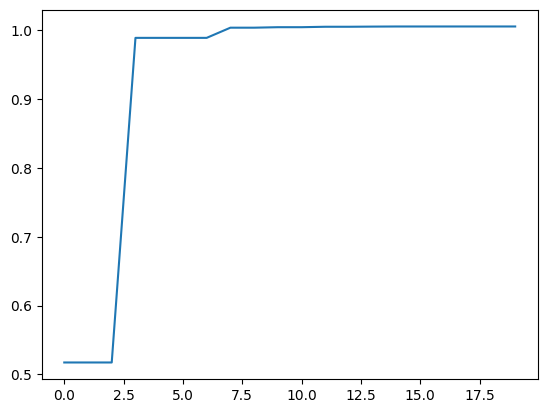

In [1]:
# -*- coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import math

def getweight():
    # 惯性权重
    weight = 1
    return weight

def getlearningrate():
    # 分别是粒子的个体和社会的学习因子，也称为加速常数
    lr = (0.49445,1.49445)
    return lr

def getmaxgen():
    # 最大迭代次数
    maxgen = 20
    return maxgen

def getsizepop():
    # 种群规模
    sizepop = 50
    return sizepop

def getrangepop():
    # 粒子的位置的范围限制,x、y方向的限制相同
    rangepop = (-2*math.pi , 2*math.pi)
    #rangepop = (-2,2)
    return rangepop

def getrangespeed():
    # 粒子的速度范围限制
    rangespeed = (-0.5,0.5)
    return rangespeed

def func(x):
    # x输入粒子位置
    # y 粒子适应度值
    if (x[0]==0)&(x[1]==0):
        y = np.exp((np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1]))/2)-2.71289
    else:
        y = np.sin(np.sqrt(x[0]**2+x[1]**2))/np.sqrt(x[0]**2+x[1]**2)+np.exp((np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1]))/2)-2.71289
    return y

def initpopvfit(sizepop):
    pop = np.zeros((sizepop,2))
    v = np.zeros((sizepop,2))
    fitness = np.zeros(sizepop)

    for i in range(sizepop):
        pop[i] = [(np.random.rand()-0.5)*rangepop[0]*2,(np.random.rand()-0.5)*rangepop[1]*2]
        v[i] = [(np.random.rand()-0.5)*rangepop[0]*2,(np.random.rand()-0.5)*rangepop[1]*2]
        fitness[i] = func(pop[i])
    return pop,v,fitness

def getinitbest(fitness,pop):
    # 群体最优的粒子位置及其适应度值
    gbestpop,gbestfitness = pop[fitness.argmax()].copy(),fitness.max()
    #个体最优的粒子位置及其适应度值,使用copy()使得对pop的改变不影响pbestpop，pbestfitness类似
    pbestpop,pbestfitness = pop.copy(),fitness.copy()

    return gbestpop,gbestfitness,pbestpop,pbestfitness  

w = getweight()
lr = getlearningrate()
maxgen = getmaxgen()
sizepop = getsizepop()
rangepop = getrangepop()
rangespeed = getrangespeed()

pop,v,fitness = initpopvfit(sizepop)
gbestpop,gbestfitness,pbestpop,pbestfitness = getinitbest(fitness,pop)

result = np.zeros(maxgen)
for i in range(maxgen):
        t=0.5
        #速度更新
        for j in range(sizepop):
            v[j] += lr[0]*np.random.rand()*(pbestpop[j]-pop[j])+lr[1]*np.random.rand()*(gbestpop-pop[j])
        v[v<rangespeed[0]] = rangespeed[0]
        v[v>rangespeed[1]] = rangespeed[1]

        #粒子位置更新
        for j in range(sizepop):
            #pop[j] += 0.5*v[j]
            pop[j] = t*(0.5*v[j])+(1-t)*pop[j]
        pop[pop<rangepop[0]] = rangepop[0]
        pop[pop>rangepop[1]] = rangepop[1]

        #适应度更新
        for j in range(sizepop):
            fitness[j] = func(pop[j])

        for j in range(sizepop):
            if fitness[j] > pbestfitness[j]:
                pbestfitness[j] = fitness[j]
                pbestpop[j] = pop[j].copy()

        if pbestfitness.max() > gbestfitness :
            gbestfitness = pbestfitness.max()
            gbestpop = pop[pbestfitness.argmax()].copy()

        result[i] = gbestfitness


plt.plot(result)
plt.show()

In [2]:
result

array([0.51744368, 0.51744368, 0.51744368, 0.98885325, 0.98885325,
       0.98885325, 0.98885325, 1.00363772, 1.00363772, 1.00435015,
       1.00435015, 1.00498527, 1.00498527, 1.0052142 , 1.00537065,
       1.00537065, 1.005382  , 1.00538932, 1.00538932, 1.00539142])